In [57]:
import random


In [68]:
# import sys
D=[]
count=0
while True:
    if count ==0:
        Type=input()#sys.stdin.readline()
        print('a',count)
    elif count ==1:
        N=int(input())#sys.stdin.readline())
        print('b',count)
    elif count<=N+1:
        input()
        print('get ready')
    elif 1+N<count<=2*N+1:
        D.append(list(map(float,input().split()))) #sys.stdin.readline())))
        print('c',count)
    elif count>=2*N+2:
        break
    count=count+1
    

1
a 0
2
b 1
3
get ready
4
get ready
189.01530464 148.863776311 189.951697757 248.581933355 107.500740461 165.581595255 119.128648623 226.208153933 226.073184997 104.079221354 24.2760452425 73.5139339819 167.278378962 185.075317215 182.877259771 183.945626531 35.6335274995 65.9100534083 218.5717332 135.87074598 272.096811145 227.356310512 136.015473121 204.962971608 241.925123237 174.581880136 223.685628591 95.2262944829 72.5117853495 115.596275585 240.831384287 103.525451924 22.8377403883 182.855656791 138.993039916 144.301118832 123.96951135 68.0172829372 165.175368093 202.67002382 201.545679994 179.975259225 107.337134289 237.539482099 67.5465116364 183.047427113 216.981973004 0.0 240.663363419 190.307573559 265.301522049 144.728954806 102.253627632 173.682899499 184.82595263 33.3508038701 112.749460576 201.285286402 71.573186866 186.118533891 107.431604838 98.1779077596 151.678687925 212.218712362 110.104044018 228.164238912 188.82663783 146.691750358 227.09785067 147.870650327 135.

In [69]:
D

[[189.01530464, 148.863776311, 189.951697757, 248.581933355, 107.500740461, 165.581595255, 119.128648623, 226.208153933, 226.073184997, 104.079221354, 24.2760452425, 73.5139339819, 167.278378962, 185.075317215, 182.877259771, 183.945626531, 35.6335274995, 65.9100534083, 218.5717332, 135.87074598, 272.096811145, 227.356310512, 136.015473121, 204.962971608, 241.925123237, 174.581880136, 223.685628591, 95.2262944829, 72.5117853495, 115.596275585, 240.831384287, 103.525451924, 22.8377403883, 182.855656791, 138.993039916, 144.301118832, 123.96951135, 68.0172829372, 165.175368093, 202.67002382, 201.545679994, 179.975259225, 107.337134289, 237.539482099, 67.5465116364, 183.047427113, 216.981973004, 0.0, 240.663363419, 190.307573559, 265.301522049, 144.728954806, 102.253627632, 173.682899499, 184.82595263, 33.3508038701, 112.749460576, 201.285286402, 71.573186866, 186.118533891, 107.431604838, 98.1779077596, 151.678687925, 212.218712362, 110.104044018, 228.164238912, 188.82663783, 146.69175035

In [7]:
def closest(D, n):
    closest = []
    for i in range(n):
        dlist = [[D[i][j] ,j] for j in range(n) if j != i]#generates a list of neighbours sorted with distance from i to j
        dlist.sort()
        closest.append(dlist)
    return closest

In [8]:
def length(tour,D,N):
    z = dist(tour[0][-1], tour[0][0],D)    # edge from last to first city of the tour
    z+=sum(tour[1])      # add length of edge from city i-1 to i
    return z


In [9]:
def is_in(j,LIST):
    for i in LIST:
        if j==i:
            return True
    return False

In [10]:
def return_nearest(i,A,unvisited):
    j=0
    #print(len(A))
    while j < len(A):
        c=A[i][j][1]
        if is_in(c,unvisited):
            return A[i][j]
        else:
            j+=1
    return[999]
    

In [11]:
def create_tour(D,i,N):
    unvisited=list(range(N))
    A=closest(D,N)
    length=[]
    prev=i
    Tour=[i]
    unvisited.remove(i)
    while unvisited!=[]:
        temp=return_nearest(prev,A,unvisited)
        next=temp[1]
        length.append(temp[0])
        Tour.append(next)
        unvisited.remove(next)
        prev=next
    cost=sum(length)
    cost=cost+D[next][i]
    return (Tour,cost)

In [12]:
def cost(Tour,D):#use only for GA created Tours with no added distance sum
    rcost=0
    lenght=len(Tour)
    for i in range(lenght-1):
        rcost=rcost+D[Tour[i]][Tour[i+1]]
        #print(rcost)
    rcost=rcost+D[Tour[lenght-1]][Tour[0]]
    return rcost

In [13]:
def sortsol(l):
    l.sort(key = lambda x: x[1])  
    return l

In [14]:
def fitness(sol):
    sum=0
    fitness_sum=0
    fitness=[]
    for i in range(len(sol)):
        fitness_sum=fitness_sum+(1/sol[i][1])**2
    for j in range(len(sol)):
        a=((1/(sol[j][1])**2)/(fitness_sum))
        fitness.append(a)
    return fitness
    

In [15]:
def mk_parent(sol,Fitness,bestsize):
    parents=[]
    #for i in range(bestsize):
        #parents.append(sol[i][0])
    psum=0
    i=0
    for i in range(0, len(sol)): #- bestsize):
        a=random.uniform(0,1)
        psum=0
        i=0
        while True:
            psum+=Fitness[i]
            if psum>=a:
                parents.append(sol[i][0])
                break
            i+=1
    return parents


In [17]:
def make_babies(parent1, parent2):
    child = []
    child_1 = []
    half1_1=[]
    half1_2=[]
    child_2 = []
    half2_1=[]
    half2_2=[]
    
    splicepoint1 = int(random.random() * len(parent1))
    splicepoint2 = int(random.random() * len(parent1))
    
    startsplice = min(splicepoint1, splicepoint2)
    endsplice = max(splicepoint1, splicepoint2)

    for i in range(startsplice, endsplice):
        half1_1.append(parent1[i])
        #print(parent2)
        half2_1.append(parent2[i])
        
    half1_2 = [j for j in parent2 if j not in half1_1]
    #half2_2 = [j for j in parent1 if j not in half2_1]

    child_1 = half1_1+half1_2
    #child_2 = half2_1+half2_2
    return child_1#,child_2]

In [19]:
def babies(parents, bestsize):
    children = []
    length = len(parents) - bestsize
    parentset = random.sample(parents, len(parents))

    #for i in range(0,bestsize):
        #children.append(parents[i])
    
    for i in range(0, length):
        child = make_babies(parentset[i], parentset[len(parents)-i-1])
        children.append(child)#[0])
        #children.append(child[1])
    return children

In [20]:
def mutate(route,rate):
    i=int(random.random()*len(route))
    j=int(random.random()*len(route))
    input=route[:]
    if j>i:
        route=input[:i+1]+input[j-1:i:-1] + input[j:]
    elif i>j:
        route=input[:j+1]+input[i-1:j:-1] + input[i:]
            
    return route

In [21]:
def make_sol(tempsol):
    A=[]
    costtemp=0
    for i in range(len(tempsol)):
        costtemp=cost(tempsol[i],D)
        A.append((tempsol[i],costtemp))
    return A

In [22]:
def mutate_children(children, rate):
    mutated=[]
    for i in range(len(children)):
        mutatedchild=mutate(children[i],rate)
        mutated.append(mutatedchild)
    return mutated


In [23]:
def edge_exchange(route,D):
    best = route
    improved = True
    while improved:
        improved = False
        for a in range(1, len(route) - 2):
            for b in range(a + 1, len(route)):
                if b - a == 1: continue  # changes nothing, skip then
                newroute = route[:]
                newroute[a:b] = route[b - 1:a - 1:-1] #this swap works for non evuclidiean as well
                if cost(newroute,D) < cost(best,D):
                    best = newroute
                    improved = True
                    route = best
    return best

In [72]:
def genetic_algorithmfinal(D,N,genrations,rate,bestsize=2):
    import random

    sol=[]
    solution=[]
    #performance=[]
    for i in range(N):
        B=create_tour(D,i,N)
        #T=edge_exchange(D,B)
        #sol.append((T,cost(T,D)))
        sol.append(B)
    sol=sortsol(sol)
    solution=sol[:]
    prevbest=sol[0][0]
    print(*prevbest)
    #performance.append((sol[0][1],0))
    
        
    for i in range(genrations):
        selected=solution[0:25]
        R=fitness(selected)
        parents=mk_parent(selected,fitness(selected),bestsize)
        children=babies(parents,bestsize)
        solset=mutate_children(children,rate)
        solved=[]
        for k in range(len(children)):
            solved.append(edge_exchange(solset[k],D))
        solution=make_sol(solved)
        for j in range(0,bestsize):
            solution.append(selected[j])
        solution=sortsol(solution)
        #print(solution)
        best=solution[0]
        #performance.append((best[1],i))
        i+=1
        if best[0]!= prevbest:
            prevbest=best[0]
            print(*prevbest)
    return
        
        

In [ ]:
import numpy as np
N=return_type_n(1)[1]
D=distmatrix(N)
ra=[]
for i in range(10):
    ra.append(genetic_algorithmfinal(D,N,20,i/10))

No handles with labels found to put in legend.


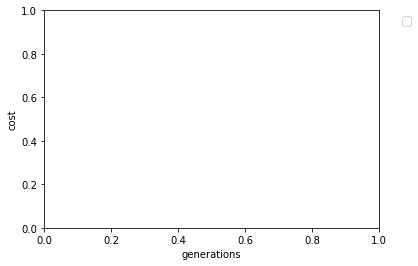

In [28]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('large')
colors=['b', 'g','r','c', 'y', 'm', 'k','slategrey','orange','sienna','tab:brown','tab:purple','w']
for i in range(int(len(ra))):
    testList2 = [(elem1, elem2) for elem2, elem1 in ra[i][1]]
    zip(*testList2)
    p=plt.plot(*zip(*testList2),label=str(i/10),c=colors[i])
plt.xlabel('generations')
plt.ylabel('cost')
plt.title('')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

plt.show()

In [26]:
genetic_algorithmfinal(D,N,20,0)

58 11 86 6 13 21 41 42 85 83 2 71 94 18 28 33 35 10 81 4 84 46 93 97 65 49 1 16 39 23 48 19 73 60 55 22 54 76 69 59 89 5 66 56 92 36 40 82 74 62 50 78 53 90 91 8 37 75 47 29 25 57 87 24 44 7 68 9 26 52 96 43 77 72 70 27 12 14 98 15 67 32 79 38 51 99 95 63 30 45 64 31 3 0 88 34 80 61 17 20
1 16 39 53 90 92 56 66 5 4 81 10 35 33 28 89 59 69 76 54 22 55 60 73 19 48 23 96 21 13 6 86 11 58 34 80 61 17 24 44 7 68 43 77 72 70 27 12 14 36 40 82 41 78 50 62 88 8 91 95 63 30 71 18 94 20 42 85 83 2 37 75 47 29 25 57 87 74 9 26 52 45 64 84 46 93 97 65 49 99 67 15 98 32 79 38 51 0 3 31


[1, 16, 39, 53, 90, 92, 56, 66, 5, 4, 81, 10, 35, 33, 28, 89, 59, 69, 76, 54, 22, 55, 60, 73, 19, 48, 23, 96, 21, 13, 6, 86, 11, 58, 34, 80, 61, 17, 24, 44, 7, 68, 43, 77, 72, 70, 27, 12, 14, 36, 40, 82, 41, 78, 50, 62, 88, 8, 91, 95, 63, 30, 71, 18, 94, 20, 42, 85, 83, 2, 37, 75, 47, 29, 25, 57, 87, 74, 9, 26, 52, 45, 64, 84, 46, 93, 97, 65, 49, 99, 67, 15, 98, 32, 79, 38, 51, 0, 3, 31]